##Deep Learning Regression with Admissions Data

From Codecademy:

"For this project, you will create a deep learning regression model that predicts the likelihood that a student applying to graduate school will be accepted based on various application factors (such as test scores)."

The data used for this project is a graduate admissions dataset FROM Kaggle,and it provides information about 500 applications for various universities and what their chance of admittance is.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('Admission_Predict.csv')

#Check dataset
display(dataset.columns)
display(dataset.head())
display(dataset.describe())


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


To make a model that predicts an applicant's likelihood of getting accepted to a master's program, we need to distinguish the features, any categorical variables, and which column we are trying to predict.

 All of the  variables are numerical, so there are not categorical variables that need to be mapped. As well, the 'Serial No.' column should not be used as a predictor because it is an index column.

In [3]:
dataset = dataset.drop('Serial No.',axis=1)

features = dataset.iloc[:,:-1]
label = dataset.iloc[:,-1]

dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The next steps of creating the model are to split the sets and then ensure all of the variables have the same scale.

In [4]:
features_training, features_test, label_training, label_test = train_test_split(
    features, 
    label, 
    test_size = 0.30,
    random_state = 42
)

scaler = StandardScaler()

features_training = scaler.fit_transform(features_training)
features_test = scaler.transform(features_test)



I am still in the process of completing this section of the project, which is creating, testing, and then tuning the neural network model. But, here is the code that I have  while playing around with the batch size, the layers, and the optimizer.

In [17]:
#Still in the process of hyperparameter tuning
#model = Sequential([
#layers.InputLayer(input_shape=(features_training.shape[1],)),
#layers.Dense(16, activation='relu',name='layer1'),
#layers.Dense(1),
#])

#opti = keras.optimizers.Adam(learning_rate = 0.1)
#model.compile(loss='mse', metrics=['mae'], optimizer=opti)

#history = model.fit(features_training, label_training, epochs=100, batch_size=20, verbose=0, validation_split=0.2)

In [15]:
#rmse, rmae = model.evaluate(features_test, label_test)
#print(history.history.keys())
#print(rmse,rmae)

4/4 [==============================] - 0s 750us/step - loss: 0.0055 - mae: 0.0545
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
0.005477041006088257 0.054504942148923874


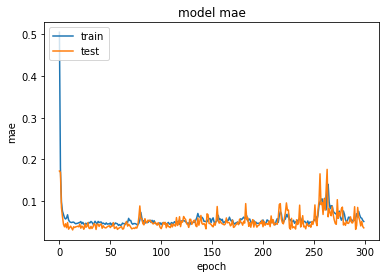

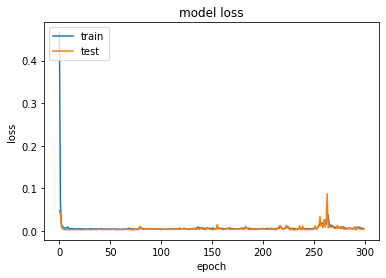

In [16]:
#plt.plot(history.history['mae'])
#plt.plot(history.history['val_mae'])
#plt.ylabel('mae')
#plt.xlabel('epoch')
#plt.title('model mae')
#plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
#plt.clf()

#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
#plt.show()